In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from PIL import Image
import numpy as np
import os

In [2]:
X_pics = []
y_list = []

In [6]:
im_path2 = 'brick_pics_mine/'
# Read the whole directory and bring all pictures in as examples
X2_list0= os.listdir(im_path2)
X2_list = [file for file in X2_list0 if file[-5:] == '.jpeg']

y2_list = [int(filename[:-9]) for filename in X2_list]

# Adding to the same X_pics and y_list set
for picfile in X2_list:
    fname = im_path2 + picfile
    content = Image.open(fname, 'r')
    X_pics.append(content)
    y_list.append(int(picfile[:-9]))

In [9]:
def convert_to_gray(X):
    '''Converts numpy array of N RGB pictures of dimension mxn (times 3 colors)
       and returns a numpy array of the same dimensions where all channels are
       the same
       INPUT:  X, numpy array
       OUTPUT: X_gray, numpy array
    '''
    X_gray = np.mean(X, -1).astype(np.uint8)
    X_gray = np.expand_dims(X_gray, axis=-1)
    X_gray = np.concatenate([X_gray, X_gray, X_gray],axis=-1)
    return X_gray

In [13]:
shape = list(X_pics[0].shape)
shape[:0]=[len(X_pics)]
X = np.empty(shape)
for idx in range(shape[0]):
    X[idx]=X_pics[idx]

In [14]:
X = convert_to_gray(X)

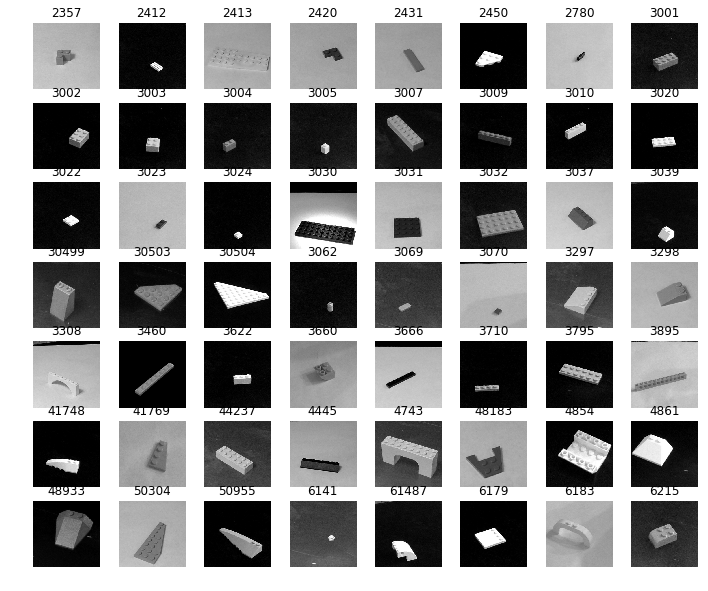

In [19]:
fig, axes = plt.subplots(7,8,figsize=(12,10))
for idx, ax in enumerate( axes.flatten()):
    ax.imshow(X[idx])
    ax.grid(False)
    ax.axis('off')
    ax.set_title(y_list[idx])

plt.savefig("all_examples.png", bbox_inches='tight');